## Collision and Citation Data Project

For this project I am using the Montgomery County Parking Citation Data (link to this dataset is: https://data.montgomerycountymd.gov/Transportation/DOT-Parking-Tickets/uyb2-cfmc) and the Maryland Crash Data (link to this dataset is:  https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Circum_weather/q6mx-6mk8). There is also a data dictionary for this dataset (link:https://catalog.data.gov/dataset/maryland-statewide-vehicle-crash-data-dictionary-f4840). 

For this project I will be investigating my hypothesis that more crashes and parking violations occurred during the winter and if there is a correlation between crashes and citations in Montgomery County. 

In [1]:
import pandas as pd
import datetime
from datetime import datetime
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn

In [2]:
pd.set_option('display.max_columns', None) #resetting options to show all of the columns in the dataframes

### Dataset 1: Montgomery County Parking Citation Data 

In [3]:
citations=pd.read_csv('https://data.montgomerycountymd.gov/api/views/uyb2-cfmc/rows.csv?accessType=DOWNLOAD', engine='python')
#downloading data of citations from Montgomery County from July 2019 to June of 2020 and loading it into dataframe

In [4]:
citations

,Ticket Number,Date/Time,Parking Division,Ticket Location,Meter,Violation Code,Violation Description,Plate Year,Vehicle Make,Plate Month,Vehicle Type,Vehicle Color,Remarks,Issuing Agency
0,407607690,08/26/0019 01:41:00 PM,2,8100 NORFOLK AVE,1104302,50.0,EXPIRED PRKG METER,2021,SUBA,9.0,4D,WH,2 HR PARKING,DOT
1,407556122,08/15/0019 05:07:00 PM,2,G40-4935 ST ELMO AVE,3400323,50.0,EXPIRED PRKG METER,2019,TESL,10.0,4D,RE,4 HR PARKING,DOT
2,407841700,10/18/0019 09:25:00 AM,8,MEDICAL CENTER DR,1601887,50.0,EXPIRED PRKG METER,2019,BMW,10.0,4D,GY,12 HR PARKING,DOT
3,407344663,07/08/0019 10:47:00 AM,2,4800 HAMPDEN LN,1103032,50.0,EXPIRED PRKG METER,2020,FORD,2.0,4D,WH,1 HR PARKING,DOT
4,407645910,09/02/0019 10:56:00 AM,2,7000 WISCONSIN AVE,1105612,50.0,EXPIRED PRKG METER,2020,TOYT,10.0,4D,SI,1 HR PARKING,DOT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127126,408114814,12/15/0019 04:18:00 PM,3,800 ROEDER RD,1207011,50.0,EXPIRED PRKG METER,2020,VOLK,3.0,4D,SI,2 HR PARKING,DOT
127127,407392871,07/12/0019 06:12:00 PM,8A,11815 GRAND PARK AVE,NaN,35.0,VIOLATION OFFICIAL SIGN ON STREET,2019,HOND,10.0,4D,GY,NO PARKING 5 PM - 12 AM/. SIGNS POSTED,DOT
127128,407777322,10/04/0019 06:14:00 PM,3,G2-8700 CAMERON ST,3021058,50.0,EXPIRED PRKG METER,2019,NISS,1.0,SU,WH,2 HR PARKING,DOT
127129,408161364,12/28/0019 12:39:00 PM,2,L24-4601 LELAND ST,2240108,50.0,EXPIRED PRKG METER,2021,HOND,5.0,4D,SI,2 HR PARKING,DOT


In [5]:
citations.info() #looking at data types and number of non-null values for each of the columns of the citation dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127131 entries, 0 to 127130
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Ticket Number          127131 non-null  int64  
 1   Date/Time              127130 non-null  object 
 2   Parking Division       126994 non-null  object 
 3   Ticket Location        126356 non-null  object 
 4   Meter                  100210 non-null  object 
 5   Violation Code         127009 non-null  float64
 6   Violation Description  127009 non-null  object 
 7   Plate Year             119490 non-null  object 
 8   Vehicle Make           126435 non-null  object 
 9   Plate Month            118588 non-null  float64
 10  Vehicle Type           126437 non-null  object 
 11  Vehicle Color          126437 non-null  object 
 12  Remarks                126262 non-null  object 
 13  Issuing Agency         127130 non-null  object 
dtypes: float64(2), int64(1), object(11)


In [6]:
c=citations['Date/Time'].isnull() #finding the null row in the Date/Time column

In [7]:
citations[c] #showing the null row to get the index number

,Ticket Number,Date/Time,Parking Division,Ticket Location,Meter,Violation Code,Violation Description,Plate Year,Vehicle Make,Plate Month,Vehicle Type,Vehicle Color,Remarks,Issuing Agency
114929,127130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
citations.drop(114929, axis=0, inplace=True) #dropping this row from dataframe because it contains mostly null values

In [9]:
index=[]
for i in range(len(citations)):
    index.append(i)
citations.insert(0, "Index", index, False)
citations.set_index('Index', inplace=True)
#resetting the index after dropping the row with the null values

While looking at the Date/Time column, I saw that the years were marked as '0019', and '0020' instead of '2019' and '2020' so I replaced the original year values with '2019' and '2020.' I also split up the Date/Time column to two separate columns to be able to group the data by date and time more easily.

In [10]:
dates=[] #putting all date values from citation data into list so that there could be a separate column for dates
for date in citations['Date/Time']:
    date=str(date)
    dt=date[0:10]
    if dt[6:10]=='0019': #replacing '0019' year values with '2019' to make it easier to convert this column to datetime
        dte=dt[0:6]+'2019'
        dates.append(dte)
    elif dt[6:10]=='0020': #replacing '0020' year values with '2020' to make it easier to convert this column to datetime
        dte=dt[0:6]+'2020'
        dates.append(dte)

The times in the Date/Time column were not in military time, so I converted them to military time so that I could more easily compare the crash and citation data.

In [11]:
times=[] #putting all time values from citation data into list that there could be a separate column for times
for time in citations['Date/Time']:
    time=str(time)
    tm=time[11:22]
    if tm[:2]=='12': #in military time 12:00AM is shown 0:00 and 12:00PM is 12:00, so I wanted a separate loop for hour 12 because if I added 12 to 12:00PM, the result would be over 24 hours which is not accurate
        if tm[9:11]=='AM':
            hr=int(tm[0:2])-12
            t=str(hr)+tm[2:8]
            times.append(t)
        elif tm[9:11]=='PM':
            times.append(tm[0:8])
    elif tm[9:11]=='AM': 
        times.append(tm[0:8])
    elif tm[9:11]=='PM': 
        hr=int(tm[0:2])+12 #adding 12 to evening times to convert times to military times
        t=str(hr)+tm[2:8]
        times.append(t)

In [12]:
citations.insert(2, "Dates", dates, False) #inserting date list as column in citation dataframe
citations.insert(2, "Times", times, False) #inserting time list as column in citation dataframe

In [13]:
citations['Dates']=pd.to_datetime(citations['Dates']).dt.date 
#converting 'Dates' columns into datetime.date

In [14]:
print('Min Citation Date: ', citations['Dates'].min(), 'Max Citation Date: ', citations['Dates'].max())

Min Citation Date:  2019-07-03 Max Citation Date:  2020-07-02


In [15]:
citations['Times']=pd.to_datetime(citations['Times'], format='%H:%M:%S').dt.time
#converting Times to datetime.time

In [16]:
print('Min Citation Time: ', citations['Times'].min(), 'Max Citation Time: ', citations['Times'].max())

Min Citation Time:  05:50:00 Max Citation Time:  21:58:00


In [17]:
citations

,Ticket Number,Date/Time,Times,Dates,Parking Division,Ticket Location,Meter,Violation Code,Violation Description,Plate Year,Vehicle Make,Plate Month,Vehicle Type,Vehicle Color,Remarks,Issuing Agency
Index,,,,,,,,,,,,,,,,
0,407607690,08/26/0019 01:41:00 PM,13:41:00,2019-08-26,2,8100 NORFOLK AVE,1104302,50.0,EXPIRED PRKG METER,2021,SUBA,9.0,4D,WH,2 HR PARKING,DOT
1,407556122,08/15/0019 05:07:00 PM,17:07:00,2019-08-15,2,G40-4935 ST ELMO AVE,3400323,50.0,EXPIRED PRKG METER,2019,TESL,10.0,4D,RE,4 HR PARKING,DOT
2,407841700,10/18/0019 09:25:00 AM,09:25:00,2019-10-18,8,MEDICAL CENTER DR,1601887,50.0,EXPIRED PRKG METER,2019,BMW,10.0,4D,GY,12 HR PARKING,DOT
3,407344663,07/08/0019 10:47:00 AM,10:47:00,2019-07-08,2,4800 HAMPDEN LN,1103032,50.0,EXPIRED PRKG METER,2020,FORD,2.0,4D,WH,1 HR PARKING,DOT
4,407645910,09/02/0019 10:56:00 AM,10:56:00,2019-09-02,2,7000 WISCONSIN AVE,1105612,50.0,EXPIRED PRKG METER,2020,TOYT,10.0,4D,SI,1 HR PARKING,DOT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127125,408114814,12/15/0019 04:18:00 PM,16:18:00,2019-12-15,3,800 ROEDER RD,1207011,50.0,EXPIRED PRKG METER,2020,VOLK,3.0,4D,SI,2 HR PARKING,DOT
127126,407392871,07/12/0019 06:12:00 PM,18:12:00,2019-07-12,8A,11815 GRAND PARK AVE,NaN,35.0,VIOLATION OFFICIAL SIGN ON STREET,2019,HOND,10.0,4D,GY,NO PARKING 5 PM - 12 AM/. SIGNS POSTED,DOT
127127,407777322,10/04/0019 06:14:00 PM,18:14:00,2019-10-04,3,G2-8700 CAMERON ST,3021058,50.0,EXPIRED PRKG METER,2019,NISS,1.0,SU,WH,2 HR PARKING,DOT


### Dataset 2: Maryland Crash Data

In [18]:
crashdata=pd.read_csv('https://opendata.maryland.gov/api/views/65du-s3qu/rows.csv?accessType=DOWNLOAD', engine='python') 
#downloading Maryland Crash Data from January 2015 to June 2020 and loading it into dataframe

In [19]:
crashdata

,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,COLLISION_TYPE_DESC,COLLISION_TYPE_CODE,SURF_COND_DESC,SURF_COND_CODE,LANE_DESC,LANE_CODE,RD_COND_DESC,RD_COND_CODE,RD_DIV_DESC,RD_DIV_CODE,FIX_OBJ_DESC,FIX_OBJ_CODE,REPORT_NO,REPORT_TYPE,WEATHER_DESC,WEATHER_CODE,ACC_DATE,ACC_TIME,LOC_CODE,SIGNAL_FLAG_DESC,SIGNAL_FLAG,C_M_ZONE_FLAG,AGENCY_CODE,AREA_CODE,HARM_EVENT_DESC1,HARM_EVENT_CODE1,HARM_EVENT_DESC2,HARM_EVENT_CODE2,RTE_NO,ROUTE_TYPE_CODE,RTE_SUFFIX,LOG_MILE,LOGMILE_DIR_FLAG_DESC,LOGMILE_DIR_FLAG,MAINROAD_NAME,DISTANCE,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION
0,2020,Q2,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,NaN,Other,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,AE58770052,Property Damage Crash,Not Applicable,0.00,20200618,15:15:00,NaN,No,N,N,BACOPD,UNK,Parked Vehicle,2.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.277263,-76.503693,POINT (-76.5036932 39.27726285)
1,2020,Q2,NaN,6.02,Baltimore City,24.0,NaN,NaN,Non Intersection,1.0,Other,88,Dry,2.0,Left Turn Lane,2.0,No Defects,1.0,One-way Trafficway,2.0,Other Pole,10.0,ADJ984001J,Injury Crash,NaN,7.01,20200430,06:39:00,1003,Yes,Y,N,BALTIMORE,UNK,Other Vehicle,1.0,Other Vehicle,1.0,NaN,NaN,NaN,0.000,NaN,NaN,CHARLES STREET,2.00,Miles,M,N,NaN,NaN,NaN,NORTH AVE,39.311025,-76.616429,POINT (-76.616429453205 39.311024794431)
2,2020,Q2,Daylight,1.00,Montgomery,15.0,NaN,NaN,NaN,NaN,Other,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,EJ7878001D,Injury Crash,NaN,6.01,20200504,09:46:00,54222,No,N,N,GAITHERSBURG,UNK,Pedestrian,3.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.140680,-77.193413,POINT (-77.193412729561 39.140680249069)
3,2017,Q2,Daylight,1.00,Baltimore City,24.0,NaN,NaN,NaN,NaN,Single Vehicle,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,ADI7910042,Injury Crash,Other,88.00,20170507,10:39:00,CAD#0830,Yes,Y,N,BALTIMORE,UNK,NaN,3.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.282928,-76.635215,POINT (-76.6352150952347 39.2829284750108)
4,2020,Q2,Daylight,1.00,Cecil,7.0,NaN,NaN,NaN,NaN,Same Direction Rear End,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,MSP6709008R,Property Damage Crash,NaN,6.01,20200414,17:32:00,NaN,No,N,N,MSP,UNK,Other Vehicle,1.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.611028,-75.951314,POINT (-75.951314 39.611027833333)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639937,2019,Q3,Daylight,1.00,Charles,8.0,NaN,0.0,Not Applicable,0.0,Same Direction Rear End,3,Dry,2.0,Right Turn Lane,1.0,No Defects,1.0,"Two-way, Not Divided",1.0,Not Applicable,0.0,MDTA1582000H,Property Damage Crash,NaN,6.01,20190824,11:30:00,N09,No,N,N,MDTA,UNK,NaN,1.0,Other Vehicle,1.0,301.0,US,NaN,1.280,North,N,CRAIN HWY,0.22,NaN,M,N,0.0,UU,NaN,STRUC #CHZ301 POTOMAC RIVER,38.363845,-76.980606,POINT (-76.98060605635531 38.363845415321)
639938,2019,Q3,Daylight,1.00,Montgomery,15.0,NaN,63.0,Intersection,2.0,Head On Left Turn,2,Dry,2.0,NaN,NaN,No Defects,1.0,"Two-way, Divided, Positive Median Barrier",4.0,Not Applicable,0.0,MCP1475002C,Injury Crash,NaN,6.01,20190922,10:00:00,54114,Yes,Y,N,MONTGOMERY,UNK,NaN,1.0,Not Applicable,0.0,340.0,MU,NaN,0.980,North,N,RUSSELL AVE,0.00,NaN,F,N,182.0,MU,NaN,LAKE FOREST BLVD,39.151418,-77.207443,POINT (-77.2074433333333 39.1514183333333)
639939,2016,Q2,Daylight,1.00,Baltimore,3.0,NaN,0.0,Non Intersection,1.0,Single Vehicle,17,Dry,2.0,NaN,NaN,No Defects,1.0,"Two-way, Not Divided",1.0,Tree Shrubbery,11.0,AE5643000S,Property Damage Crash,NaN,6.01,20160510,06:09:00,PC01 114,No,N,N,BACOPD,UNK,NaN,9.0,Not Applicable,0.0,2937.0,CO,NaN,0.0

In [20]:
crashdata.isnull().sum() #looking at the number of null values in each of the columns

YEAR                          0
QUARTER                       0
LIGHT_DESC                21114
LIGHT_CODE                    0
COUNTY_DESC                   3
COUNTY_NO                     3
MUNI_DESC                639942
MUNI_CODE                170622
JUNCTION_DESC             84962
JUNCTION_CODE             65230
COLLISION_TYPE_DESC           0
COLLISION_TYPE_CODE           0
SURF_COND_DESC            66990
SURF_COND_CODE            65230
LANE_DESC                155039
LANE_CODE                155031
RD_COND_DESC              65230
RD_COND_CODE              65230
RD_DIV_DESC               68753
RD_DIV_CODE               65230
FIX_OBJ_DESC              33806
FIX_OBJ_CODE                  0
REPORT_NO                     0
REPORT_TYPE              110733
WEATHER_DESC             244800
WEATHER_CODE                  0
ACC_DATE                      0
ACC_TIME                      0
LOC_CODE                 338729
SIGNAL_FLAG_DESC              0
SIGNAL_FLAG                   0
C_M_ZONE

Because of the size of the dataset, I dropped some columns that were not necessary for this project.

In [21]:
crashdata=crashdata.drop(columns=['COUNTY_NO', 'MUNI_CODE', 'JUNCTION_CODE', 'JUNCTION_DESC', 'COLLISION_TYPE_DESC','LANE_DESC','RD_DIV_DESC','FIX_OBJ_DESC','SIGNAL_FLAG_DESC','AGENCY_CODE','C_M_ZONE_FLAG','AREA_CODE','HARM_EVENT_DESC1','HARM_EVENT_DESC2','DISTANCE','MUNI_DESC','LOGMILE_DIR_FLAG_DESC','FEET_MILES_FLAG_DESC','FEET_MILES_FLAG','DISTANCE_DIR_FLAG', 'LOG_MILE','LOGMILE_DIR_FLAG_DESC','LOGMILE_DIR_FLAG','RTE_NO','ROUTE_TYPE_CODE', 'RTE_SUFFIX', 'REFERENCE_SUFFIX', 'LOC_CODE', 'WEATHER_DESC', 'SURF_COND_DESC', 'SURF_COND_DESC'], axis=1)
#dropping columns not needed for this project to make dataset smaller

In [22]:
crashdata['COUNTY_DESC'].value_counts() #looking at the different counties included in the dataset and the number of crashes that occurred in each county

Baltimore          117288
Baltimore City     114810
Prince George's    101379
Montgomery          76393
Anne Arundel        58047
Howard              22193
Frederick           19687
Harford             18451
Charles             16172
Washington          14165
Wicomico            12246
Carroll             11360
Cecil                9861
St. Mary's           9289
Worcester            7880
Calvert              6571
Talbot               4482
Queen Anne's         4477
Allegany             3551
Dorchester           3031
Garrett              2934
Caroline             2644
Somerset             1791
Kent                 1237
Name: COUNTY_DESC, dtype: int64

Since the citation data is only from Montgomery County, I only used crash data from Montgomery County.

In [23]:
crashdata2=crashdata.loc[crashdata.COUNTY_DESC=='Montgomery'] 
#making new dataframe with crash data from Montgomery County only

Since the citation data starts at 07/03/2019, I made a new dataframe with only dates starting from July 2019 on. The citation dataset has data until 07/02/2020. The crash data was recently updated to include data up until 09/30/2020 so I decided to drop the crashes that took place after 07/02/2020 so I would be looking at the same time period for both data sets. I started by creating a new dataframe from the year 2019 on.

In [24]:
crashdata_df3=crashdata2.loc[crashdata2.YEAR>=2019] #creating a new dataframe with only crashes that happended in 2019 and 2020

In [25]:
index=[]
for i in range(len(crashdata_df3)):
    index.append(i)
crashdata_df3.insert(0, "Index", index, False)
crashdata_df3.set_index('Index', inplace=True)
#resetting the index after creating new dataframe

When I looked at the 'ACC_DATE' column in dataframe, the date was formatted as year, month, day without any slashes. I reformatted the dates to be in mm/dd/yyyy format to make it easier to convert the dates to datetime.

In [26]:
acc_dates=[] #putting all the times into a list to insert a new column with the date formatted as mm/dd/yyyy
for date in crashdata_df3['ACC_DATE']:
    date=str(date)
    dt=date[4:6]+'/'+date[6:9]+'/'+date[0:4] #changing format
    acc_dates.append(dt)

In [27]:
crashdata_df3.insert(17, "ACCIDENT_DATE", acc_dates, False) 
#inserting acc_dates list as column in dataframe

In [28]:
crashdata_df3=crashdata_df3.drop('ACC_DATE', axis=1)
#dropping the original 'ACC_DATE' column

In [29]:
crashdata_df3['ACCIDENT_DATE']=pd.to_datetime(crashdata_df3['ACCIDENT_DATE']).dt.date 
#converting the 'ACCIDENT_DATE' column to datetime.date 

In [30]:
j2019=datetime.strptime('07/03/2019', '%m/%d/%Y').date() #converting string to datetime.date
crashdata_df3=crashdata_df3.loc[crashdata_df3.ACCIDENT_DATE>=j2019] #making new dataframe in which the min date is 07/03/2019

In [31]:
j2020=datetime.strptime('07/02/2020', '%m/%d/%Y').date() #converting string to datetime.date
crashdata_df3=crashdata_df3.loc[crashdata_df3.ACCIDENT_DATE<=j2020] #making new dataframe in which the max date is 07/02/2020

In [32]:
index=[]
for i in range(len(crashdata_df3)):
    index.append(i)
crashdata_df3.insert(0, "Index", index, False)
crashdata_df3.set_index('Index', inplace=True)
#resetting index after dropping rows that were outside of the desired date range

In [33]:
print('Min Crash Date: ', crashdata_df3['ACCIDENT_DATE'].min(), 'Max Crash Date: ', crashdata_df3['ACCIDENT_DATE'].max())

Min Crash Date:  2019-07-03 Max Crash Date:  2020-07-02


In [34]:
crashdata_df3['ACC_TIME']=pd.to_datetime(crashdata_df3['ACC_TIME']).dt.time
#converting ACC_TIME column to datetime.time

In [35]:
print('Min Crash Time: ', crashdata_df3['ACC_TIME'].min(), 'Max Crash Time: ', crashdata_df3['ACC_TIME'].max())

Min Crash Time:  00:00:00 Max Crash Time:  23:59:00


### Exploratory Data Analysis: Citation Data

In [36]:
citations

,Ticket Number,Date/Time,Times,Dates,Parking Division,Ticket Location,Meter,Violation Code,Violation Description,Plate Year,Vehicle Make,Plate Month,Vehicle Type,Vehicle Color,Remarks,Issuing Agency
Index,,,,,,,,,,,,,,,,
0,407607690,08/26/0019 01:41:00 PM,13:41:00,2019-08-26,2,8100 NORFOLK AVE,1104302,50.0,EXPIRED PRKG METER,2021,SUBA,9.0,4D,WH,2 HR PARKING,DOT
1,407556122,08/15/0019 05:07:00 PM,17:07:00,2019-08-15,2,G40-4935 ST ELMO AVE,3400323,50.0,EXPIRED PRKG METER,2019,TESL,10.0,4D,RE,4 HR PARKING,DOT
2,407841700,10/18/0019 09:25:00 AM,09:25:00,2019-10-18,8,MEDICAL CENTER DR,1601887,50.0,EXPIRED PRKG METER,2019,BMW,10.0,4D,GY,12 HR PARKING,DOT
3,407344663,07/08/0019 10:47:00 AM,10:47:00,2019-07-08,2,4800 HAMPDEN LN,1103032,50.0,EXPIRED PRKG METER,2020,FORD,2.0,4D,WH,1 HR PARKING,DOT
4,407645910,09/02/0019 10:56:00 AM,10:56:00,2019-09-02,2,7000 WISCONSIN AVE,1105612,50.0,EXPIRED PRKG METER,2020,TOYT,10.0,4D,SI,1 HR PARKING,DOT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127125,408114814,12/15/0019 04:18:00 PM,16:18:00,2019-12-15,3,800 ROEDER RD,1207011,50.0,EXPIRED PRKG METER,2020,VOLK,3.0,4D,SI,2 HR PARKING,DOT
127126,407392871,07/12/0019 06:12:00 PM,18:12:00,2019-07-12,8A,11815 GRAND PARK AVE,NaN,35.0,VIOLATION OFFICIAL SIGN ON STREET,2019,HOND,10.0,4D,GY,NO PARKING 5 PM - 12 AM/. SIGNS POSTED,DOT
127127,407777322,10/04/0019 06:14:00 PM,18:14:00,2019-10-04,3,G2-8700 CAMERON ST,3021058,50.0,EXPIRED PRKG METER,2019,NISS,1.0,SU,WH,2 HR PARKING,DOT


#### Hours:

I first wanted to see during which hours were the most parking citations given out. I started by extracting the hours out of each of the citation times and putting them into a list.

In [37]:
hours=[] #putting all the hour values into a list to insert as a column in citation dataframe
for h in range(len(citations)):
    hr=citations['Times'][h].hour #extracting the hour value from each of the times
    hours.append(hr)

In [38]:
citations.insert(2, 'Hours', hours, False)
#inserting hours column into dataframe

In [39]:
by_cithours=citations.groupby(['Hours']) 
by_cithours=by_cithours['Hours'].count()
#grouping data by hour 

In [43]:
by_cithours

Hours
5         1
6      1158
7      4833
8      4650
9      7226
10     9880
11    11546
12    12346
13    11757
14     8732
15     9407
16     7871
17     5887
18     9246
19     8877
20     9415
21     4298
Name: Hours, dtype: int64

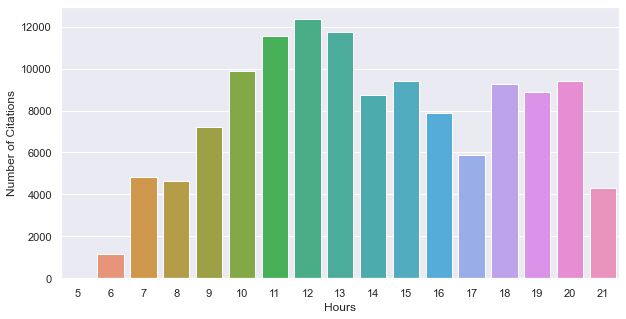

In [97]:
seaborn.set(rc={'figure.figsize':(10,5)})
plot1=seaborn.barplot(y=by_cithours, x=by_cithours.index)
plot1.set(xlabel='Hours', ylabel = 'Number of Citations');

From the bar graph we can see that most of the citations were given around hour 12, 12 pm. From the graph it does not appear that there were citations given between 22:00-4:00.

#### Violations:

I also wanted to look at the most common violations.

In [57]:
print('Violation Code: ', citations['Violation Code'].nunique(), 'Violation Description: ', citations['Violation Description'].nunique())
#number of unique values for Violation Code and Violation Description columns                                                                                                     

Violation Code:  38 Violation Description:  38


I wanted the violation descriptions to be listed next to the violation codes so that it was clear what the violation was for so I printed each value of both series out next to each other. 

The top 10 violations:

In [58]:
code=citations['Violation Code'].value_counts().head(10)
description=citations['Violation Description'].value_counts().head(10)
#saving the series for top 10 codes and descriptions as variables

In [59]:
for i in range(len(code.index)): #printing violations codes and descriptions
    ind=code.index[i]
    print('Violation: ', code.index[i], description.index[i], ': ', 'Number of Citations: ', code[ind])

Violation:  50.0 EXPIRED PRKG METER :  Number of Citations:  97213
Violation:  7.0 OVERTM PRKG - STREET :  Number of Citations:  6732
Violation:  34.0 NPAT - ON STREET :  Number of Citations:  4397
Violation:  17.0 PRK/STND/STOP RUSH H :  Number of Citations:  3323
Violation:  35.0 VIOLATION OFFICIAL SIGN  ON STREET :  Number of Citations:  2876
Violation:  2.0 UNREGISTERED VEH  ON STR :  Number of Citations:  2636
Violation:  54.0 RES PRKG PERMIT ONLY :  Number of Citations:  2541
Violation:  42.0 UNREG VEH OFF STREET :  Number of Citations:  2355
Violation:  36.0 OFFICIAL SIGN OFF ST :  Number of Citations:  2293
Violation:  23.0 NO STANDING - ON STR :  Number of Citations:  956


The bottom 10 violations:

In [60]:
code2=citations['Violation Code'].value_counts().tail(10)
description2=citations['Violation Description'].value_counts().tail(10)
#saving the series for bottom 10 codes and descriptions as variables

In [61]:
for i in range(len(code2.index)): #printing violations codes and descriptions
    ind=code2.index[i]
    print('Violation: ', code2.index[i], description2.index[i], ': ', 'Number of Citations: ', code2[ind])

Violation:  25.0 IMPDG TRFF/SAFE ALLY :  Number of Citations:  4
Violation:  40.0 PRK/STND/STOP CROSS :  Number of Citations:  2
Violation:  21.0 BLK ANTHR VEH OFF ST :  Number of Citations:  2
Violation:  10.0 TMP NPAT ZN OFF STRE :  Number of Citations:  2
Violation:  12.0 PRK/STND/STOP SIDEWA :  Number of Citations:  2
Violation:  39.0 WITHIN 30 FT SIG/STO :  Number of Citations:  2
Violation:  22.0 PRK/STND/STOP INTERS :  Number of Citations:  1
Violation:  11.0 PRKD WTHIN 35 FT INT :  Number of Citations:  1
Violation:  6.0 PRK/STND/STOP FIREHS :  Number of Citations:  1
Violation:  32.0 NO STND/STOP TAXI STA :  Number of Citations:  1


I then wanted to display all of the violation codes and their corresponding descriptions in descending order.

In [62]:
codeall=citations['Violation Code'].value_counts().head(38)
descriptionall=citations['Violation Description'].value_counts().head(38)

In [63]:
for i in range(len(codeall.index)): #printing violations codes and descriptions
    ind=codeall.index[i]
    print('Violation: ', codeall.index[i], descriptionall.index[i], ': ', 'Number of Citations: ', codeall[ind])

Violation:  50.0 EXPIRED PRKG METER :  Number of Citations:  97213
Violation:  7.0 OVERTM PRKG - STREET :  Number of Citations:  6732
Violation:  34.0 NPAT - ON STREET :  Number of Citations:  4397
Violation:  17.0 PRK/STND/STOP RUSH H :  Number of Citations:  3323
Violation:  35.0 VIOLATION OFFICIAL SIGN  ON STREET :  Number of Citations:  2876
Violation:  2.0 UNREGISTERED VEH  ON STR :  Number of Citations:  2636
Violation:  54.0 RES PRKG PERMIT ONLY :  Number of Citations:  2541
Violation:  42.0 UNREG VEH OFF STREET :  Number of Citations:  2355
Violation:  36.0 OFFICIAL SIGN OFF ST :  Number of Citations:  2293
Violation:  23.0 NO STANDING - ON STR :  Number of Citations:  956
Violation:  24.0 DOUBLE PARKED - STRE :  Number of Citations:  492
Violation:  3.0 EMRGNCY NPAT - STREE :  Number of Citations:  264
Violation:  19.0 WITHIN 15 FT HYDRANT :  Number of Citations:  151
Violation:  28.0 OPP TRAFFIC - ON STR :  Number of Citations:  138
Violation:  41.0 OVR 24 HRS OFF STREE :  Nu

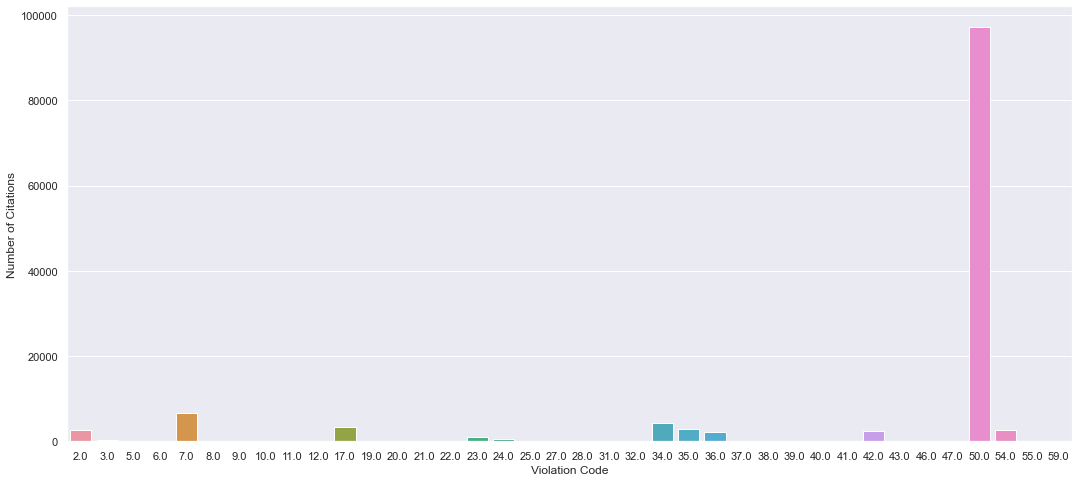

In [64]:
seaborn.set(rc={'figure.figsize':(18,8)})
plot2=seaborn.barplot(y=citations['Violation Code'].value_counts(), x=citations['Violation Code'].value_counts().index)
plot2.set(xlabel='Violation Code', ylabel = 'Number of Citations');

I wanted to see the percentages each violation made up out of the total amount of violations.

In [65]:
per_viol_code=(codeall/127130)*100 #dividing the value counts series for the violations code by the total number of citations and multiplied it to get the percentage

In [70]:
for i in range(len(per_viol_code.index)): #printing violations codes and descriptions
    ind=per_viol_code.index[i]
    print('Violation: ', per_viol_code.index[i], descriptionall.index[i], ': ', 'Percentage of Citations: ', per_viol_code[ind], '%')

Violation:  50.0 EXPIRED PRKG METER :  Percentage of Citations:  76.46739557932824 %
Violation:  7.0 OVERTM PRKG - STREET :  Percentage of Citations:  5.295366947219382 %
Violation:  34.0 NPAT - ON STREET :  Percentage of Citations:  3.4586643593172344 %
Violation:  17.0 PRK/STND/STOP RUSH H :  Percentage of Citations:  2.6138598285219854 %
Violation:  35.0 VIOLATION OFFICIAL SIGN  ON STREET :  Percentage of Citations:  2.2622512388893257 %
Violation:  2.0 UNREGISTERED VEH  ON STR :  Percentage of Citations:  2.073468103516086 %
Violation:  54.0 RES PRKG PERMIT ONLY :  Percentage of Citations:  1.9987414457641783 %
Violation:  42.0 UNREG VEH OFF STREET :  Percentage of Citations:  1.8524345158499174 %
Violation:  36.0 OFFICIAL SIGN OFF ST :  Percentage of Citations:  1.8036655392118306 %
Violation:  23.0 NO STANDING - ON STR :  Percentage of Citations:  0.751986155903406 %
Violation:  24.0 DOUBLE PARKED - STRE :  Percentage of Citations:  0.387005427515142 %
Violation:  3.0 EMRGNCY NPA

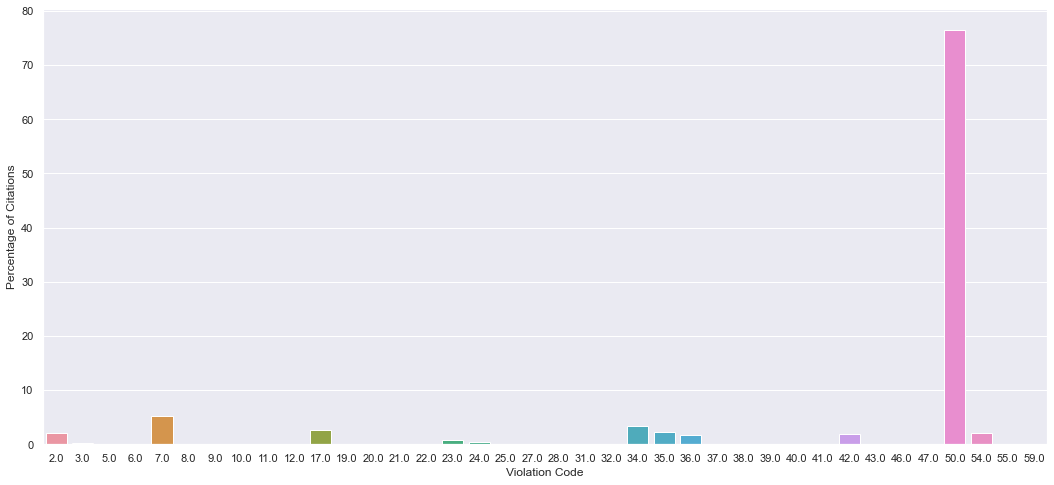

In [68]:
seaborn.set(rc={'figure.figsize':(18,8)})
plot3=seaborn.barplot(y=per_viol_code, x=per_viol_code.index)
plot3.set(xlabel='Violation Code', ylabel = 'Percentage of Citations');

#### Vehicle Make, Color, and Types:

I wanted to look at the which vehicle makes, vehicle colors, and vehicle types had the most and least amount of citations.

I did not find a data dictionary for this dataset. There are a abbreviations used in the Vehicle Make and Vehicle Color columns, because of the time constraint for this project I tried to find other sources to find what the abbreviations stood for instead of contacting the dataset owner. I will include these sources when discussing my findings on those columns below. 

#### Vehicle Make:

In [48]:
citations['Vehicle Make'].nunique() #number of unique values in this column

73

To find what the vehicle make abbreviations stood for I used this list of vehicle make abbreviations: https://pdf4pro.com/cdn/motor-vehicle-make-abbreviation-list-592398.pdf

10 vehicle makes with the most citations:

In [49]:
citations['Vehicle Make'].value_counts().head(10) 

TOYT    19476
HOND    16901
FORD    10408
CHEV     8234
NISS     8184
MERZ     5864
HYUN     4998
BMW      4988
JEEP     4720
VOLK     4051
Name: Vehicle Make, dtype: int64

The top 10 vehicle makes with the most citations were: Toyota, Honda, Ford, Chevrolet, Nissan, Mercedes-Benz, Hyundai, BMW, Jeep, and Volkswagen.

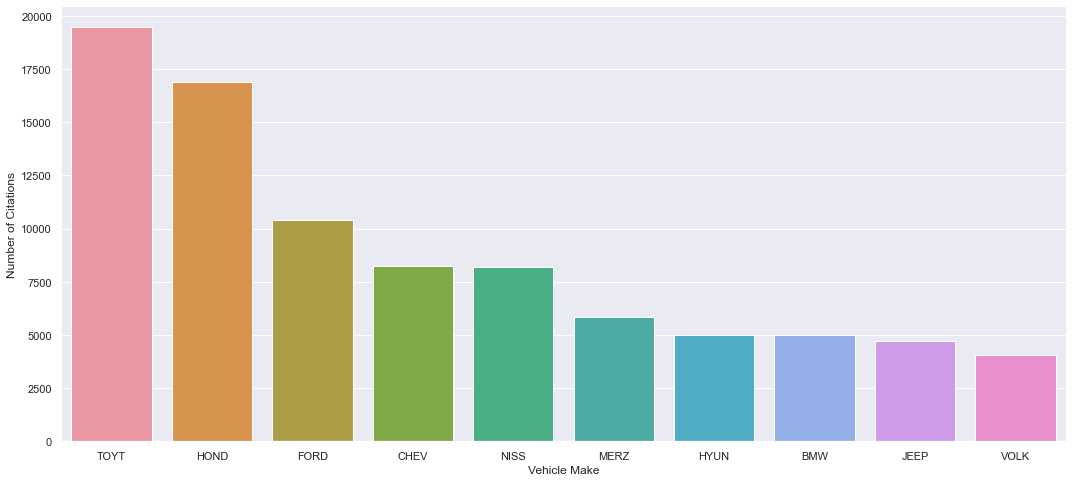

In [80]:
seaborn.set_palette("husl", 8)
plot4=seaborn.barplot(y=citations['Vehicle Make'].value_counts().head(10), x=citations['Vehicle Make'].value_counts().head(10).index)
plot4.set(xlabel='Vehicle Make', ylabel = 'Number of Citations');

10 vehicle makes with the least amount of citations:

In [50]:
citations['Vehicle Make'].value_counts().tail(10)

ROLS    2
GEO     2
UD      2
OTH     2
PLYM    2
KAWK    2
MOTO    1
AMER    1
LANC    1
LOTU    1
Name: Vehicle Make, dtype: int64

The bottom 10 vehicle makes with the least citations were: UD, GEO, Plymouth, MG, OTH (could not find this abbreviation, most likely stands for 'other'), Rolls-Royce, Lanchester, American Motors, MOTOROAM.IND.,.INC., and Lotus.

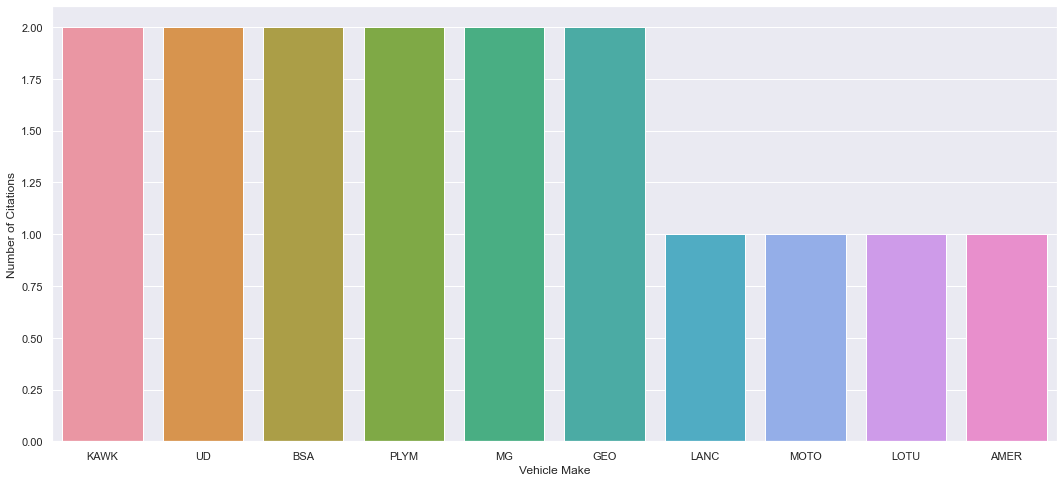

In [82]:
seaborn.set_palette("husl", 8)
plot5=seaborn.barplot(y=citations['Vehicle Make'].value_counts().tail(10), x=citations['Vehicle Make'].value_counts().tail(10).index)
plot5.set(xlabel='Vehicle Make', ylabel = 'Number of Citations');

#### Vehicle Colors:

To find what the color abbreviations stood for I used the vehicle color list from the Department of Wisconsin because many of the color abbreviations were very similar: https://wisconsindot.gov/Pages/dmv/vehicles/title-plates/veh-color-abbrev.aspx

In [51]:
citations['Vehicle Color'].nunique() #number of unique values in this column

34

5 vehicle colors with the most citations:

In [52]:
citations['Vehicle Color'].value_counts().head(5)

BK    29900
WH    25553
GY    24935
SI    18169
BL    10575
Name: Vehicle Color, dtype: int64

The top 5 vehicle colors with the most citations: black, white, gray, silver, and blue. 

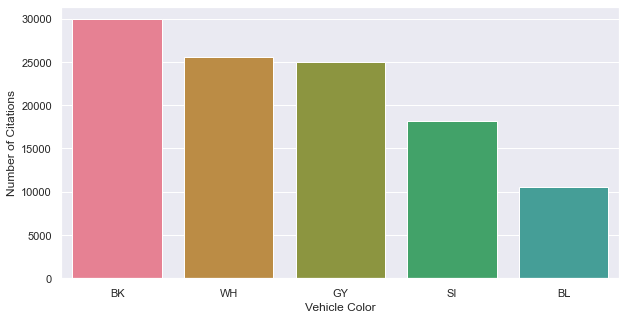

In [85]:
seaborn.set(rc={'figure.figsize':(10,5)})
seaborn.set_palette("husl", 8)
plot6=seaborn.barplot(y=citations['Vehicle Color'].value_counts().head(5), x=citations['Vehicle Color'].value_counts().head(5).index)
plot6.set(xlabel='Vehicle Color', ylabel = 'Number of Citations');

5 vehicle colors with least citations:

In [53]:
citations['Vehicle Color'].value_counts().tail(5)

BZ    6
CM    4
LV    4
CA    1
MV    1
Name: Vehicle Color, dtype: int64

The bottom 5 vehicles colors with the least citations: bronze, chrome, lavender, camouflage, and mauve.

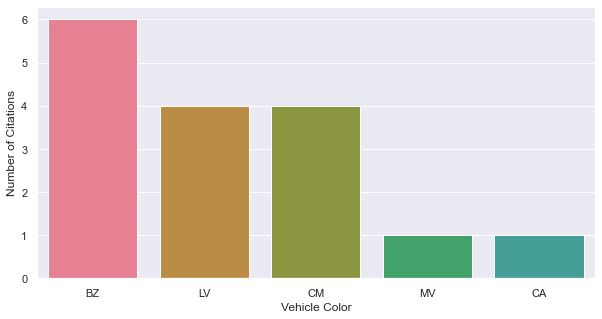

In [87]:
seaborn.set(rc={'figure.figsize':(10,5)})
seaborn.set_palette("husl", 8)
plot7=seaborn.barplot(y=citations['Vehicle Color'].value_counts().tail(5), x=citations['Vehicle Color'].value_counts().tail(5).index)
plot7.set(xlabel='Vehicle Color', ylabel = 'Number of Citations');

#### Vehicle Type:

To find the what the abbreviations in this section stood for I used this list from the California DMV: https://www.dmv.ca.gov/portal/handbook/vehicle-industry-registration-procedures-manual-2/inquiries/chart-1-body-type-model-and-body-type-codes/

In [54]:
citations['Vehicle Type'].nunique() #number of unique values in this column

14

In [55]:
citations['Vehicle Type'].value_counts()

4D    58079
SU    44576
VN     8890
2D     6138
PU     5215
TK     1941
SW      816
CV      475
TL       91
TX       89
BU       75
MC       43
BT        6
MS        3
Name: Vehicle Type, dtype: int64

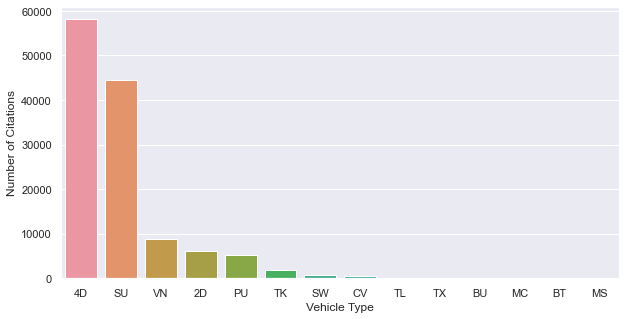

In [88]:
plot8=seaborn.barplot(y=citations['Vehicle Type'].value_counts(), x=citations['Vehicle Type'].value_counts().index)
plot8.set(xlabel='Vehicle Type', ylabel = 'Number of Citations');

3 vehicle types with most citations:

In [56]:
citations['Vehicle Type'].value_counts().head(3)

4D    58079
SU    44576
VN     8890
Name: Vehicle Type, dtype: int64

The top 3 vehicle types with the most citations: 4 door sedans, SUVs, and vans. 

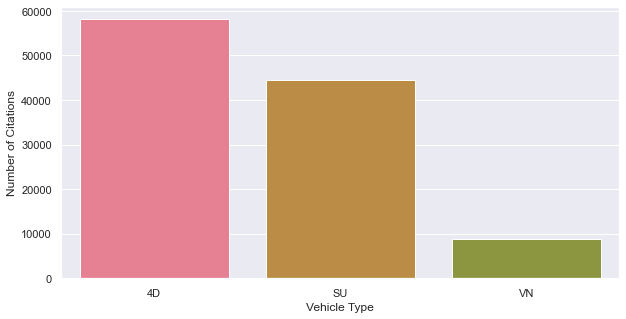

In [89]:
plot9=seaborn.barplot(y=citations['Vehicle Type'].value_counts().head(3), x=citations['Vehicle Type'].value_counts().head(3).index)
plot9.set(xlabel='Vehicle Type', ylabel = 'Number of Citations');

3 vehicle types with least citations:

In [57]:
citations['Vehicle Type'].value_counts().tail(3)

MC    43
BT     6
MS     3
Name: Vehicle Type, dtype: int64

The bottom 3 vehicle types with the least citations: motorcycles, boats, and motorscooters.

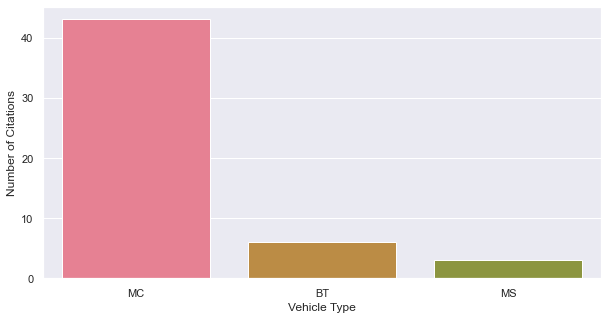

In [90]:
plot10=seaborn.barplot(y=citations['Vehicle Type'].value_counts().tail(3), x=citations['Vehicle Type'].value_counts().tail(3).index)
plot10.set(xlabel='Vehicle Type', ylabel = 'Number of Citations');

### Exploratory Data Analysis: Crash Data

There was a data dictionary for this dataset (link:https://catalog.data.gov/dataset/maryland-statewide-vehicle-crash-data-dictionary-f4840), which I used to determine what the codes for some of the columns meant.

#### Hours:

In [92]:
crashdata_df3

,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COLLISION_TYPE_CODE,SURF_COND_CODE,LANE_CODE,RD_COND_DESC,RD_COND_CODE,RD_DIV_CODE,FIX_OBJ_CODE,REPORT_NO,REPORT_TYPE,WEATHER_CODE,ACC_TIME,ACCIDENT_DATE,SIGNAL_FLAG,HARM_EVENT_CODE1,HARM_EVENT_CODE2,MAINROAD_NAME,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2020,Q2,Daylight,1.0,Montgomery,88,NaN,NaN,NaN,NaN,NaN,0.0,EJ7878001D,Injury Crash,6.01,09:46:00,2020-05-04,N,3.0,0.0,NaN,NaN,NaN,NaN,39.140680,-77.193413,POINT (-77.193412729561 39.140680249069)
1,2020,Q2,Daylight,1.0,Montgomery,88,NaN,NaN,NaN,NaN,NaN,0.0,MCP23720030,Property Damage Crash,6.01,11:05:00,2020-06-30,N,2.0,0.0,NaN,NaN,NaN,NaN,39.051872,-77.111598,POINT (-77.111598166667 39.0518715)
2,2020,Q2,Daylight,1.0,Montgomery,17,NaN,NaN,NaN,NaN,NaN,7.0,MCP2859008W,Property Damage Crash,7.01,13:20:00,2020-04-01,N,9.0,0.0,NaN,NaN,NaN,NaN,39.119458,-77.211542,POINT (-77.211541666667 39.119458333333)
3,2020,Q2,Daylight,1.0,Montgomery,17,NaN,NaN,NaN,NaN,NaN,2.0,MCP32350015,Property Damage Crash,6.01,16:19:00,2020-06-12,N,9.0,0.0,NaN,NaN,NaN,NaN,39.038177,-76.990072,POINT (-76.990071666667 39.038176666667)
4,2020,Q2,Dark Lights On,3.0,Montgomery,17,NaN,NaN,NaN,NaN,NaN,8.0,MCP3156001C,Property Damage Crash,7.01,01:20:00,2020-05-29,N,9.0,10.0,NaN,NaN,NaN,NaN,38.990567,-77.023835,POINT (-77.023835 38.990566666667)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11675,2019,Q3,Daylight,1.0,Montgomery,7,2.0,3.0,No Defects,1.0,4.0,0.0,MCP3112002W,Property Damage Crash,7.01,15:02:00,2019-07-24,Y,1.0,0.0,BRADLEY BLVD,362.0,CO,ARLINGTON RD,38.978215,-77.098181,POINT (-77.098181 38.978215)
11676,2019,Q3,Daylight,1.0,Montgomery,9,2.0,2.0,No Defects,1.0,4.0,0.0,MCP32010008,Property Damage Crash,0.00,13:03:00,2019-09-08,N,1.0,0.0,EISENHOWER MEMORIAL HWY,0.0,UU,MILE MARKER 18.0,39.256142,-77.304413,POINT (-77.30441333333331 39.2561416666667)
11677,2019,Q3,Daylight,1.0,Montgomery,3,2.0,6.0,No Defects,1.0,4.0,0.0,MSP692000B3,Injury Crash,6.01,17:55:00,2019-07-31,N,1.0,1.0,EISENHOWER MEMORIAL HWY,212.0,CO,SHADY GROVE RD,39.109364,-77.185876,POINT (-77.1858761666667 39.1093643)


I first wanted to see during which hours the most amount of crashes took place.

In [93]:
hours_crash=[] #putting all the hour values into a list to insert as a column in crash dataframe
for h in range(len(crashdata_df3)):
    hr=crashdata_df3['ACC_TIME'][h].hour #extracting the hour value from each of the times
    hours_crash.append(hr)

In [94]:
crashdata_df3.insert(2, 'HOURS', hours_crash, False)
#inserting hours column into dataframe

In [95]:
by_acchours=crashdata_df3.groupby(['HOURS']) 
by_acchours=by_acchours['HOURS'].count()
#grouping data by hour

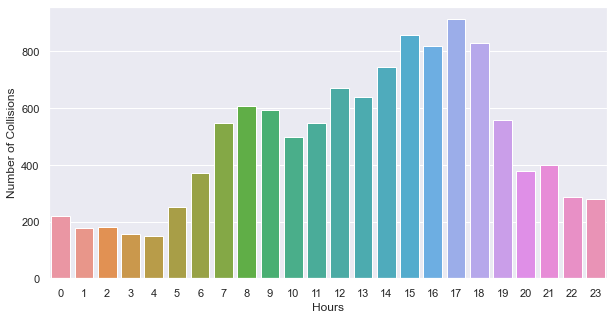

In [96]:
plot11=seaborn.barplot(y=by_acchours, x=by_acchours.index)
plot11.set(xlabel='Hours', ylabel = 'Number of Collisions');

From the bar graph we can see that most of the crashes took place around hour 17, around 5 pm.

#### Weather Code:

I also wanted to see what the weather was when the crashes took place.

In [98]:
crashdata_df3['WEATHER_CODE'].nunique() #number of unique values for WEATHER_CODE column

12

All of the weather codes and their descriptions:

0.00:	Not Applicable

2.00:	Foggy

3.00:	Raining

5.00:	Severe Winds

6.01:	Clear

7.01:	Cloudy

8.04:	Snow

9.04:	Sleet

10.04:	Blowing Snow

11.88:	Blowing Sand, Soil, Dirt

12.04:	Wintry Mix

88.00:	Other

99.00:	Unknown

In [99]:
crashdata_df3['WEATHER_CODE'].value_counts()

6.01     7724
3.00     1621
7.01     1233
0.00      917
99.00      65
2.00       53
8.04       24
88.00      14
12.04      13
9.04        9
5.00        5
10.04       2
Name: WEATHER_CODE, dtype: int64

The most crashes took place when the weather was marked as 'clear.' And the least amount took place when the weather was marked as 'blowing snow.' None of the crashes were marked as taking place when there was 'blowing sand, soil, dirt.'

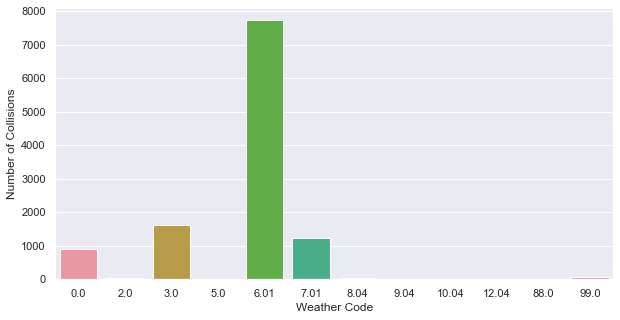

In [103]:
plot12=seaborn.barplot(y=crashdata_df3['WEATHER_CODE'].value_counts(), x=crashdata_df3['WEATHER_CODE'].value_counts().index)
plot12.set(xlabel='Weather Code', ylabel = 'Number of Collisions');

#### Light Code:

I wanted to see what the lighting was when the crashes took place as well.

In [101]:
crashdata_df3['LIGHT_CODE'].nunique() #number of unique values for LIGHT_CODE column

9

All of the light codes and their descriptions:

0.00:	Not Applicable

1.00:	Daylight

3.00:	Dark Lights On

4.00:	Dark No Lights

5.02:	Dawn

6.02:	Dusk

7.88:	Dark - Unknown Lighting

88.00:	Other

99.00:	Unknown

In [102]:
crashdata_df3['LIGHT_CODE'].value_counts()

1.00     7326
3.00     3102
4.00      409
5.02      260
6.02      240
7.88      173
0.00       84
99.00      62
88.00      24
Name: LIGHT_CODE, dtype: int64

Most of the crashes when the lighting was marked as being 'daylight.' The least amount of crashes when the lighting was marked as being 'other.'

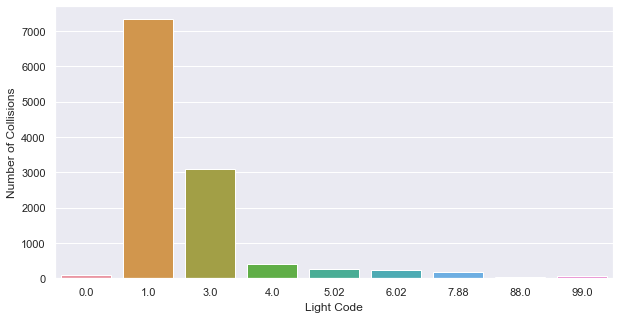

In [105]:
seaborn.set_palette("husl", 8)
plot13=seaborn.barplot(y=crashdata_df3['LIGHT_CODE'].value_counts(), x=crashdata_df3['LIGHT_CODE'].value_counts().index)
plot13.set(xlabel='Light Code', ylabel = 'Number of Collisions');

#### Collision Type:

I also wanted to look at the types of collisions that occurred.

In [106]:
crashdata_df3['COLLISION_TYPE_CODE'].nunique() #number of unique values for LIGHT_CODE column

19

All of the collision codes and their descriptions:

0:	Not Applicable

1:	Head On

2:	Head On Left Turn

3:	Same Direction Rear End

4:	Same Direction Rear End Right Turn

5:	Same Direction Rear End Left Turn

6:	Opposite Direction Sideswipe

7:	Same Direction Sideswipe

8:	Same Direction Right Turn

9:	Same Direction Left Turn

10:	Same Direction Both Left Turn

11:	Same Movement Angle

12:	Angle Meets Right Turn

13:	Angle Meets Left Turn

14:	Angle Meets Left Turn Head On

15:	Opposite Direction Both Left Turn

17:	Single Vehicle

88:	Other

99:	Unknown

In [107]:
crashdata_df3['COLLISION_TYPE_CODE'].value_counts().head(19)

3     3466
17    2202
11    1545
88    1499
7     1182
2      564
9      225
8      210
1      201
6      157
13     107
12      64
99      62
0       52
10      38
14      33
5       30
4       27
15      16
Name: COLLISION_TYPE_CODE, dtype: int64

Most of the collisions that happened were of the type 'same direction rear end.' Collisions of type 'opposite direction both left turn' were the least common. 

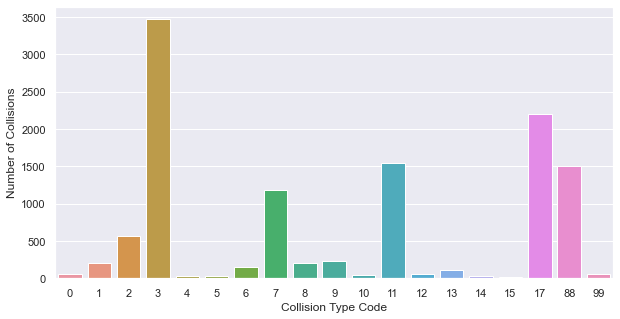

In [108]:
seaborn.set_palette("husl", 8)
plot14=seaborn.barplot(y=crashdata_df3['COLLISION_TYPE_CODE'].value_counts(), x=crashdata_df3['COLLISION_TYPE_CODE'].value_counts().index)
plot14.set(xlabel='Collision Type Code', ylabel = 'Number of Collisions');

### Hypothesis: There will be more crashes and citations during winter than during other seasons.

In order to investigate this hypothesis, I first looked up when each of the seasons started and made variables for the start dates and converted them to datetime.date. 

In [109]:
#making variables for start dates of each of the seasons in the dataset and converting them to datetime.date
summer2019=datetime.strptime('06/21/2019', '%m/%d/%Y').date()
summer2020=datetime.strptime('06/20/2020', '%m/%d/%Y').date()
fall2019=datetime.strptime('09/23/2019', '%m/%d/%Y').date()
winter2019=datetime.strptime('12/21/2019', '%m/%d/%Y').date()
spring2019=datetime.strptime('03/20/2019', '%m/%d/%Y').date()
spring2020=datetime.strptime('03/19/2020', '%m/%d/%Y').date()

I then made a for loop to go through all of the dates in the ACCIDENT_DATE column and appened the season the date was in to a list.

In [110]:
seasons_crashes=[] #making a list of all of the seasons for the dates in ACCIDENT_DATE
for date in crashdata_df3['ACCIDENT_DATE']:
    if summer2019<=date<fall2019: 
        seasons_crashes.append('Summer')
    elif fall2019<=date<winter2019:
        seasons_crashes.append('Fall')
    elif winter2019<=date<spring2020:
        seasons_crashes.append('Winter')
    elif spring2020<=date<summer2020:
        seasons_crashes.append('Spring')
    elif summer2020<=date:
        seasons_crashes.append('Summer')

In [111]:
crashdata_df3.insert(2, "Seasons", seasons_crashes, False)
#inserting the seasons_crashes list into dataframe as column

I then did the same process with the citation dataframe.

In [112]:
seasons_citations=[] #making a list of all the seasons for the dates in Times column of citation dataframe
for date in citations['Dates']:
    if summer2019<=date<fall2019:
        seasons_citations.append('Summer')
    elif fall2019<=date<winter2019:
        seasons_citations.append('Fall')
    elif winter2019<=date<spring2020:
        seasons_citations.append('Winter')
    elif spring2020<=date<summer2020:
        seasons_citations.append('Spring')
    elif summer2020<=date:
        seasons_citations.append('Summer')

In [113]:
citations.insert(2, "Seasons", seasons_citations, False)
#inserting seasons_citations list into dataframe as column

I then grouped each of the dataframes by the season column and merged them into one dataframe to make them easier to compare.

In [114]:
by_accseason=crashdata_df3.groupby(['Seasons']) 
by_accseason=by_accseason['Seasons'].count()
#grouping crash data by season

In [115]:
by_accseason

Seasons
Fall      3739
Spring    1653
Summer    3193
Winter    3095
Name: Seasons, dtype: int64

In [116]:
by_citseason=citations.groupby(['Seasons'])
by_citseason=by_citseason['Seasons'].count()
#grouping citation data by season

In [117]:
by_citseason

Seasons
Fall      39634
Spring     5990
Summer    38755
Winter    42751
Name: Seasons, dtype: int64

In [118]:
by_accseasondf=crashdata_df3.groupby(['Seasons']) 
by_accseasondf=by_accseasondf['Seasons'].count().to_frame()
#grouping crash data by season and making results into a dataframe

In [119]:
by_accseasondf.columns=['AccidentSeasons']
#renaming the Seasons column in new dataframe to make it easier to distinguish from citation data results

In [120]:
by_citseasondf=citations.groupby(['Seasons'])
by_citseasondf=by_citseasondf['Seasons'].count().to_frame()
#grouping citation data by season and making results into a dataframe

In [121]:
by_citseasondf.columns=['CitationSeasons']
#renaming the Seasons column in new dataframe to make it easier to distinguish from crash data results

In [122]:
cit_crashseasons=by_accseasondf.merge(by_citseasondf, left_on='Seasons', right_index=True)
#merging the two dataframes together using a left join and merging them on the Seasons index
#Reference for Merging Dataframes: https://www.youtube.com/watch?v=jcbRt3RWcGI&ab_channel=LearnPandas

In [123]:
cit_crashseasons
#merged dataframe

,AccidentSeasons,CitationSeasons
Seasons,,
Fall,3739,39634
Spring,1653,5990
Summer,3193,38755
Winter,3095,42751


I then wanted to look at the percentage of the total number of parking violations and collisions that took place during each of the seasons. 

In [124]:
crashdata_df3.shape #looking at the total number of crashes

(11680, 29)

In [125]:
citations.shape #looking at the total number of citations

(127130, 18)

In [126]:
by_accseasonperdf=(by_accseasondf/11680)*100 
#getting the percentages of collisions that took place during each season by dividing the number of collisions that took place during each season by the total number of collisions and multiplying each by 100

In [127]:
by_citseasonperdf=(by_citseasondf/127130)*100
#getting the percentages of citations that were given during each season by dividing the number of citations that took place during each season by the total number of citations and multiplying each by 100

In [128]:
cit_crashseasonsper=by_accseasonperdf.merge(by_citseasonperdf, left_on='Seasons', right_index=True)
#merging the two dataframes together using a left join and merging them on the Seasons index
#Reference for Merging Dataframes: https://www.youtube.com/watch?v=jcbRt3RWcGI&ab_channel=LearnPandas

In [129]:
cit_crashseasonsper
#merged dataframe

,AccidentSeasons,CitationSeasons
Seasons,,
Fall,32.011986,31.175962
Spring,14.152397,4.711712
Summer,27.337329,30.484543
Winter,26.498288,33.627783


I then made bar graphs of both of the merged dataframes to visualize the restults.

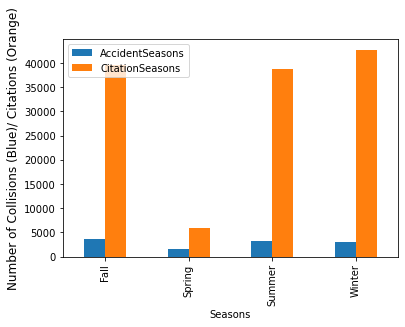

In [90]:
cit_crashseasons.plot.bar()
plt.ylabel('Number of Collisions (Blue)/ Citations (Orange)',fontsize=12)
plt.xticks(rotation='vertical')
plt.rcParams['figure.figsize']=(10,7);

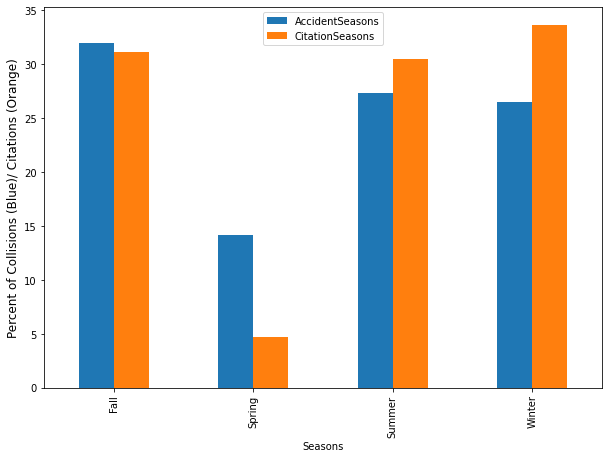

In [91]:
cit_crashseasonsper.plot.bar()
plt.ylabel('Percent of Collisions (Blue)/ Citations (Orange)',fontsize=12)
plt.xticks(rotation='vertical')
plt.rcParams['figure.figsize']=(10,7);

From looking at the bar graphs we can see that for the crash data, the most collisions took place in the Fall. The least amount of collisions took place in the Spring. The most parking citations were given out during the Winter and the least were given out during the Spring.

From the graphs it would appear as though my hypothesis would be correct for the citation data and not for the crash data, however during the Spring of 2020 and the Summer of 2020 corona virus restrictions were in place so there were less people on the roads and less people leaving their homes. The Spring category is Spring of 2020 when these restrictions were taking place. The Summer category contained crashes that happened from July 3, 2019- September 22,  2019 before corona virus and also crashes that happened from June 21, 2020 to July 2, 2020 also when corona virus restrictions were taking place. This could be the reason why these two categories were lower for both datasets. This is especially apparent in the citation dataset as there is a significant drop of citations in the Spring category. In the future I would like to look at data from before corona virus restrictions were put in place or after they were no longer in place as that may give a more accurate answer to this hypothesis.

### Is there was any correlation between the number of crashes and  citations in Montgomery County?

I first wanted to look at the days for both datasets that had the most crashes or citations.

In [92]:
crashdata_df3['ACCIDENT_DATE'].mode() #looking at the day that the most collisions happened on

0    2019-10-31
dtype: object

In [93]:
citations['Dates'].mode() #looking at the day that the most citations were given on

0    2019-12-08
dtype: object

Then I looked at the value counts for the date columns of the datasets.

In [94]:
crashdata_df3['ACCIDENT_DATE'].value_counts(ascending=True)
#looking at the number of collisions that happened for each date in the data set in ascending order
#Reference for ascending argument: https://towardsdatascience.com/getting-more-value-from-the-pandas-value-counts-aa17230907a6

2020-04-06     7
2020-03-29     7
2020-05-24     8
2020-03-31     8
2020-04-01     8
              ..
2020-01-03    62
2019-12-10    63
2019-11-07    63
2019-12-17    63
2019-10-31    98
Name: ACCIDENT_DATE, Length: 366, dtype: int64

In [95]:
citations['Dates'].value_counts(ascending=True)
#looking at the number of citations that happened for each date in the data set in ascending order
#Reference for ascending argument: https://towardsdatascience.com/getting-more-value-from-the-pandas-value-counts-aa17230907a6

2019-10-16      1
2020-06-15     22
2020-04-13     27
2020-04-22     27
2020-05-11     28
             ... 
2020-02-01    744
2020-02-27    749
2020-01-02    771
2020-02-06    780
2019-12-08    785
Name: Dates, Length: 305, dtype: int64

From looking at the value counts, there are a couple of days that are close to each other where there were a higher number of crashes and citations. For example, one of the days with the most collisions was 12/10/2019 and on 12/8/2019 was one of the days with the most citations. Another example is 1/2/2020 which was one of the days with the most citations and 1/3/2020 which was one of the days with the most crashes.

I then grouped the data for the crashes and citations by date.

In [96]:
by_accdate=crashdata_df3.groupby(['ACCIDENT_DATE']) 
by_accdate=by_accdate['ACCIDENT_DATE'].count()
#grouping data by crash date

In [97]:
by_accdate

ACCIDENT_DATE
2019-07-03    46
2019-07-04    31
2019-07-05    25
2019-07-06    27
2019-07-07    26
              ..
2020-06-28    17
2020-06-29    28
2020-06-30    16
2020-07-01    20
2020-07-02    34
Name: ACCIDENT_DATE, Length: 366, dtype: int64

In [98]:
by_citdate=citations.groupby(['Dates'])
by_citdate=by_citdate['Dates'].count()
#grouping data by citation date

In [99]:
by_citdate

Dates
2019-07-03    336
2019-07-04    686
2019-07-05    639
2019-07-07    643
2019-07-08    408
             ... 
2020-06-27     69
2020-06-28     60
2020-06-29     36
2020-07-01     93
2020-07-02     87
Name: Dates, Length: 305, dtype: int64

I then used the results to make a line graph.

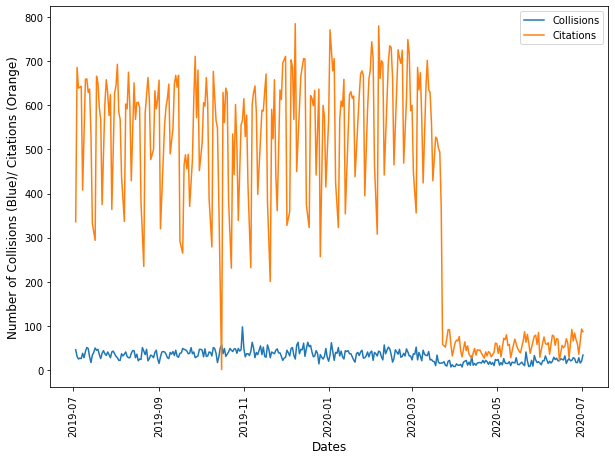

In [100]:
by_accdate.plot(label='Collisions') 
plt.ylabel('Number of Collisions (Blue)/ Citations (Orange)',fontsize=12)
plt.xlabel('Dates',fontsize=12)
plt.xticks(rotation='vertical')
plt.rcParams['figure.figsize']=(15,7);
by_citdate.plot(label='Citations')
plt.ylabel('Number of Collisions (Blue)/ Citations (Orange)',fontsize=12)
plt.xlabel('Dates',fontsize=12)
plt.xticks(rotation='vertical')
plt.rcParams['figure.figsize']=(15,7)
plt.legend(loc="best");
#Reference for lengend and labels: https://stackoverflow.com/questions/19125722/adding-a-legend-to-pyplot-in-matplotlib-in-the-simplest-manner-possible

I then wanted to make a visualization of the percentage of crashes and citations that happened on certain days.

In [101]:
crashdata_df3.shape #finding the amount of crashes there were in total

(11680, 29)

In [102]:
citations.shape #finding the amount of crashes there were in total

(127130, 18)

In [103]:
by_accdateper=(by_accdate/11680)*100

In [104]:
by_accdateper

ACCIDENT_DATE
2019-07-03    0.393836
2019-07-04    0.265411
2019-07-05    0.214041
2019-07-06    0.231164
2019-07-07    0.222603
                ...   
2020-06-28    0.145548
2020-06-29    0.239726
2020-06-30    0.136986
2020-07-01    0.171233
2020-07-02    0.291096
Name: ACCIDENT_DATE, Length: 366, dtype: float64

In [105]:
by_citdateper=(by_citdate/127130)*100

In [106]:
by_citdateper

Dates
2019-07-03    0.264296
2019-07-04    0.539605
2019-07-05    0.502635
2019-07-07    0.505781
2019-07-08    0.320931
                ...   
2020-06-27    0.054275
2020-06-28    0.047196
2020-06-29    0.028317
2020-07-01    0.073153
2020-07-02    0.068434
Name: Dates, Length: 305, dtype: float64

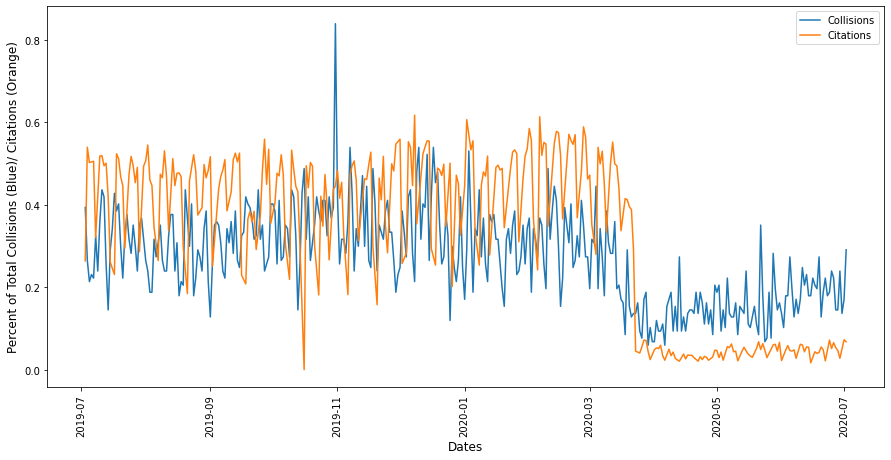

In [107]:
by_accdateper.plot(label='Collisions') 
plt.ylabel('Percent of  Total Collisions (Blue)/ Citations (Orange)',fontsize=12)
plt.xlabel('Dates',fontsize=12)
plt.xticks(rotation='vertical')
plt.rcParams['figure.figsize']=(15,7);
by_citdateper.plot(label='Citations')
plt.ylabel('Percent of Total Collisions (Blue)/ Citations (Orange)',fontsize=12)
plt.xlabel('Dates',fontsize=12)
plt.xticks(rotation='vertical')
plt.rcParams['figure.figsize']=(15,7)
plt.legend(loc="best");
#Reference for lengend and labels: https://stackoverflow.com/questions/19125722/adding-a-legend-to-pyplot-in-matplotlib-in-the-simplest-manner-possible

From looking at the graph, I saw that there did seem to be some increases in both citations and crashes around the same times. It did not appear to be a very strong relationship, but it seemed as though there was somewhat of a relationship. I also noticed that both crash and citation numbers and percentages dropped between the months of April 2020 and July 2020. This could be due to the corona virus restrictions that I discussed earlier. 

I then wanted to look at dates that had both citations and crashes, as there were dates in the datasets that were not in both.

I first started by appending the indexes of dates that were in the citations dataset but not in the crash dataset to a list of indexes and then repeated the same process that I did above.

In [108]:
crashdates=[] #making a list of all of the dates in the ACCIDENT_DATE column
for date in crashdata_df3['ACCIDENT_DATE']:
    crashdates.append(date)

In [109]:
indexes=[] #making a list of the indexes of the rows where the citation date was not in the ACCIDENT_DATE column
for d in range(len(citations['Dates'])):
    if citations['Dates'][d] in crashdates:
        True
    else:
        indexes.append(d)

Then I dropped the rows in the index list from the citations dataset.

In [110]:
citations.drop(indexes, axis=0, inplace=True)
#dropping rows in the indexes list

In [111]:
index=[]
for i in range(len(citations)):
    index.append(i)
citations.insert(0, "Index", index, False)
citations.set_index('Index', inplace=True)
#resetting the index

I then repeated the same process for the crash data.

In [112]:
citation_dates=[] #making a list of all of the dates in the Dates column of citation dataframe
for date in citations['Dates']:
    citation_dates.append(date)

In [113]:
indexs=[] #making a list of the indexes of the rows where the crash date was not in the Dates column of citation dataframe
for d in range(len(crashdata_df3['ACCIDENT_DATE'])):
    if crashdata_df3['ACCIDENT_DATE'][d] in citation_dates:
        True
    else:
        indexs.append(d)

In [114]:
crashdata_df3.drop(indexs, axis=0, inplace=True)
#dropping rows in indexs list

In [115]:
index=[]
for i in range(len(crashdata_df3)):
    index.append(i)
crashdata_df3.insert(0, "Index", index, False)
crashdata_df3.set_index('Index', inplace=True)
#resetting index

In [116]:
crashdata_df3['ACCIDENT_DATE'].value_counts(ascending=True)
#looking at the number of crashes that happened for each date in the data set in ascending order

2020-04-06     7
2020-03-29     7
2020-05-24     8
2020-04-01     8
2020-03-26     9
              ..
2019-11-18    57
2019-10-16    57
2019-12-14    61
2019-11-07    63
2019-10-31    98
Name: ACCIDENT_DATE, Length: 305, dtype: int64

In [117]:
citations['Dates'].value_counts(ascending=True)
#looking at the number of citations that happened for each date in the data set in ascending order

2019-10-16      1
2020-06-15     22
2020-04-13     27
2020-04-22     27
2020-05-11     28
             ... 
2020-02-01    744
2020-02-27    749
2020-01-02    771
2020-02-06    780
2019-12-08    785
Name: Dates, Length: 305, dtype: int64

In [118]:
by_accdate2=crashdata_df3.groupby(['ACCIDENT_DATE']) 
by_accdate2=by_accdate2['ACCIDENT_DATE'].count()
#grouping data by accident date

In [119]:
by_citdate2=citations.groupby(['Dates'])
by_citdate2=by_citdate2['Dates'].count()
#grouping data by citation date

In [120]:
by_accdate2

ACCIDENT_DATE
2019-07-03    46
2019-07-04    31
2019-07-05    25
2019-07-07    26
2019-07-08    38
              ..
2020-06-27    17
2020-06-28    17
2020-06-29    28
2020-07-01    20
2020-07-02    34
Name: ACCIDENT_DATE, Length: 305, dtype: int64

In [121]:
by_citdate2

Dates
2019-07-03    336
2019-07-04    686
2019-07-05    639
2019-07-07    643
2019-07-08    408
             ... 
2020-06-27     69
2020-06-28     60
2020-06-29     36
2020-07-01     93
2020-07-02     87
Name: Dates, Length: 305, dtype: int64

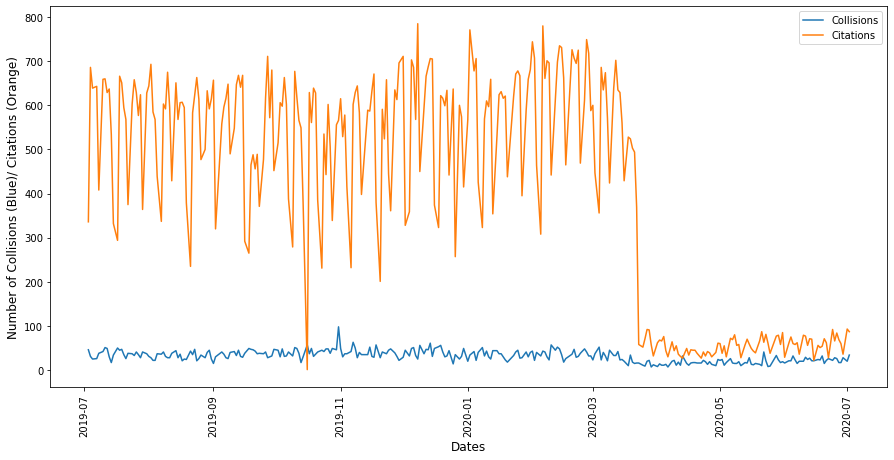

In [122]:
by_accdate2.plot(label='Collisions') 
plt.ylabel('Number of Collisions (Blue)/ Citations (Orange)',fontsize=12)
plt.xlabel('Dates',fontsize=12)
plt.xticks(rotation='vertical')
plt.rcParams['figure.figsize']=(15,7);
by_citdate2.plot(label='Citations')
plt.ylabel('Number of Collisions (Blue)/ Citations (Orange)',fontsize=12)
plt.xlabel('Dates',fontsize=12)
plt.xticks(rotation='vertical')
plt.rcParams['figure.figsize']=(15,7)
plt.legend(loc="best");
#Reference for lengend and labels: https://stackoverflow.com/questions/19125722/adding-a-legend-to-pyplot-in-matplotlib-in-the-simplest-manner-possible

In [123]:
crashdata_df3.shape #finding the amount of crashes there were in total

(9594, 29)

In [124]:
citations.shape #finding the amount of crashes there were in total

(127130, 18)

In [125]:
by_accdateper2=(by_accdate/9594)*100

In [126]:
by_accdateper2

ACCIDENT_DATE
2019-07-03    0.479466
2019-07-04    0.323119
2019-07-05    0.260580
2019-07-06    0.281426
2019-07-07    0.271003
                ...   
2020-06-28    0.177194
2020-06-29    0.291849
2020-06-30    0.166771
2020-07-01    0.208464
2020-07-02    0.354388
Name: ACCIDENT_DATE, Length: 366, dtype: float64

In [127]:
by_citdateper2=(by_citdate/127130)*100

In [128]:
by_citdateper2

Dates
2019-07-03    0.264296
2019-07-04    0.539605
2019-07-05    0.502635
2019-07-07    0.505781
2019-07-08    0.320931
                ...   
2020-06-27    0.054275
2020-06-28    0.047196
2020-06-29    0.028317
2020-07-01    0.073153
2020-07-02    0.068434
Name: Dates, Length: 305, dtype: float64

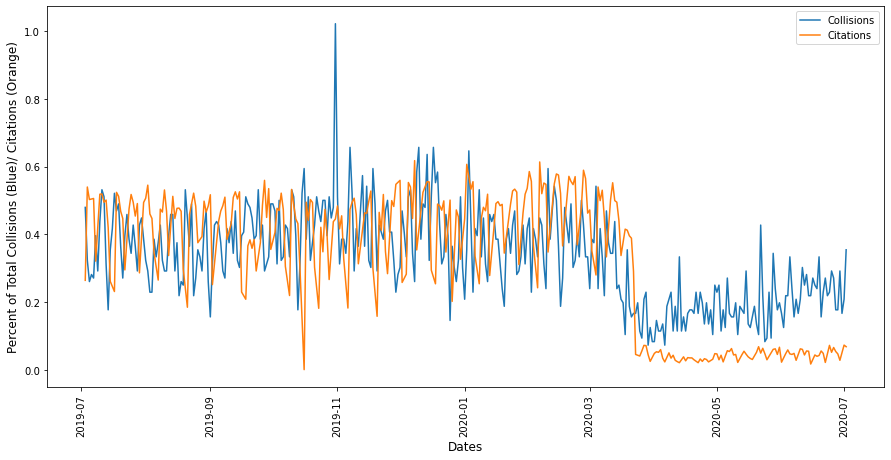

In [129]:
by_accdateper2.plot(label='Collisions') 
plt.ylabel('Percent of  Total Collisions (Blue)/ Citations (Orange)',fontsize=12)
plt.xlabel('Dates',fontsize=12)
plt.xticks(rotation='vertical')
plt.rcParams['figure.figsize']=(15,7);
by_citdateper2.plot(label='Citations')
plt.ylabel('Percent of Total Collisions (Blue)/ Citations (Orange)',fontsize=12)
plt.xlabel('Dates',fontsize=12)
plt.xticks(rotation='vertical')
plt.rcParams['figure.figsize']=(15,7)
plt.legend(loc="best");
#Reference for lengend and labels: https://stackoverflow.com/questions/19125722/adding-a-legend-to-pyplot-in-matplotlib-in-the-simplest-manner-possible

I then wanted to see if there was a correlation between the number of crashes and the number of citations. For this I used pearsonr() from scipy.stats and corr() from pandas. I then used a heatmap to visualize the results.

In [130]:
corr, pvalue=pearsonr(by_accdate2, by_citdate2)
#finding the correlation between the number of crashes and citations
#Reference: https://www.youtube.com/watch?v=TRNaMGkdn-A&ab_channel=stikpet

In [131]:
corr #Pearson's Correlation Coefficient

0.5108166433084227

In [132]:
pvalue #P-value

1.1328994789033865e-21

I then made to dataframes of the groupby results so that I could merge them together, find the correlation, and then make a heatmap of the results to show the correlation.

In [133]:
by_accdate2df=crashdata_df3.groupby(['ACCIDENT_DATE']) 
by_accdate2df=by_accdate2df['ACCIDENT_DATE'].count().to_frame()
#grouping the data by date and making result dataframe

In [134]:
by_accdate2df.index.name='Dates'
#renaming index to make merging easier

In [135]:
by_citdate2df=citations.groupby(['Dates'])
by_citdate2df=by_citdate2df['Dates'].count().to_frame()
#grouping the data by date and making result dataframe

In [136]:
by_citdate2df.index.name='Dates'
#renaming index to make merging easier

In [137]:
cit_crash=by_accdate2df.merge(by_citdate2df, left_on='Dates', right_index=True)
#merging the dataframes on the Dates index
#Reference for Merging Dataframes: https://www.youtube.com/watch?v=jcbRt3RWcGI&ab_channel=LearnPandas

In [138]:
cit_crash.columns=['AccidentDates', 'CitationDates']
#renaming columns to distinguish them from each other

In [139]:
cit_crash

,AccidentDates,CitationDates
Dates,,
2019-07-03,46,336
2019-07-04,31,686
2019-07-05,25,639
2019-07-07,26,643
2019-07-08,38,408
...,...,...
2020-06-27,17,69
2020-06-28,17,60
2020-06-29,28,36


In [140]:
cit_crash_corr=cit_crash.corr()
#finding Pearson's Correlation Coefficient 
#Reference: https://www.youtube.com/watch?v=B8LcYdblXBI&ab_channel=TheEngineeringWorld

In [141]:
cit_crash_corr

,AccidentDates,CitationDates
AccidentDates,1.000000,0.510817
CitationDates,0.510817,1.000000


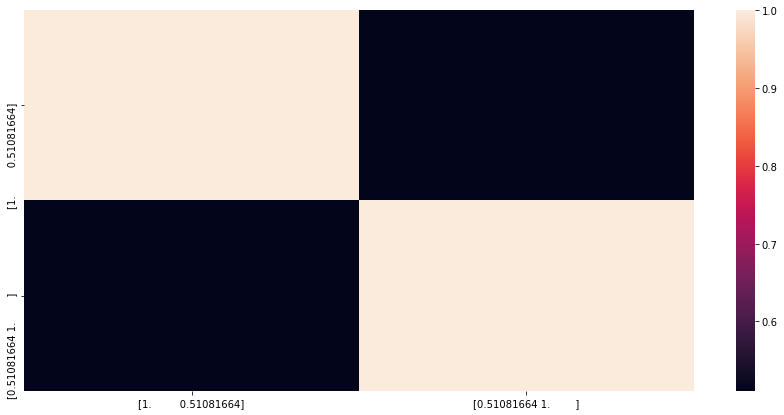

In [145]:
seaborn.heatmap(cit_crash_corr, xticklabels=cit_crash_corr.values, yticklabels=cit_crash_corr.values);
#making heatmap of correlation results
#Reference: https://www.youtube.com/watch?v=B8LcYdblXBI&ab_channel=TheEngineeringWorld

The Pearson's Correlation Coefficient was 0.5 so there did seem to be a moderate positive correlation. This is illustrated in the heatmap. In the future I would like to look more at this relationship. One of the areas that I would like to look at is the weather column to see if the weather had an impact on the number of citations and crashes.